In [1]:
# Some imports

# computation stuff
import torch
import numpy as np

# plotting stuff
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina' # makes the quality higher

import seaborn as sns
sns.set_style("whitegrid") # improves the quality of matplotlib images and adds grid

## Creation of Tensors

Tensors, basically, are generalization of matrices to more than 2 dimensions

In [4]:
numpy_array = np.arange(3)
tensor = torch.arange(3)
print(numpy_array, tensor)

[0 1 2] tensor([0, 1, 2])


In [5]:
print(f"Type of elements: {tensor.dtype}")
print(f"Size (or shape) : {tensor.size()}") # equivalent to tensor.shape # Note that we do not have () here
print(f"Number of dimensions: {tensor.dim()}")

Type of elements: torch.int64
Size (or shape) : torch.Size([3])
Number of dimensions: 1


In [ ]:
desired_shape = (3, 2, 5) 

tensor = torch.zeros(desired_shape)
print(f"Zeros tensor: {tensor}")
print(f"Shape: {tensor.shape}")
print("-----------\n")

tensor = torch.randn(desired_shape)
print(f"Random N(0, 1) tensor: {tensor}")
print(f"Shape: {tensor.shape}")

Zeros tensor: tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])
Shape: torch.Size([3, 2, 5])
-----------

Random N(0, 1) tensor: tensor([[[ 0.4594, -0.7099, -0.4500,  2.5034,  0.0758],
         [-2.2517, -2.5268,  0.3333, -0.5334,  0.9074]],

        [[ 1.5830, -0.5115, -1.0864,  0.3885, -0.7882],
         [-1.8103,  0.7750,  0.1465,  1.2012, -1.0545]],

        [[ 0.2014, -1.5351, -0.0451,  0.2569, -0.0175],
         [ 0.1143, -0.0661,  0.3118, -0.0242, -1.0013]]])
Shape: torch.Size([3, 2, 5])


In [ ]:
tensor = torch.arange(10) 
print("Orig:", tensor)
print()

tensor_reshape = tensor.reshape(2, 5)
print("Reshape:", tensor_reshape)
print("Reshape shape:", tensor_reshape.shape)
print()

tensor_view = tensor.view(2, 5)
print("View:", tensor_view)
print("View shape:", tensor_view.shape)
print()
print("Orig again:", tensor)
print("Orig shape:", tensor.shape)

Orig: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Reshape: tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
Reshape shape: torch.Size([2, 5])

View: tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
View shape: torch.Size([2, 5])

Orig again: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Orig shape: torch.Size([10])


In [8]:
tensor = torch.arange(100)
tensor_3d = tensor.view(2, 5, 10)
print("Old shape:", tensor.shape)
print("New shape:", tensor_3d.shape)

Old shape: torch.Size([100])
New shape: torch.Size([2, 5, 10])


In [9]:
tensor_3d_v2 = tensor_3d.transpose(-1, -2) # swap the two last dimensions
print(tensor_3d_v2.shape)
print()

# use permute if you want to change more than 2 dimensions
tensor_3d_v3 = tensor_3d.permute(1, 2, 0) # put the 1 dim to the 0 place, 2 dim to the 1 place and 0 to the last place
print(tensor_3d_v3.shape)

torch.Size([2, 10, 5])

torch.Size([5, 10, 2])


In [10]:
from torch.utils.data import DataLoader, Dataset

In [11]:
class SimpleDataset(Dataset):
    
    def __init__(self, data: torch.Tensor):
        self.data = data
    
    def __getitem__(self, index: int):
        return self.data[index]

    def __len__(self):
        return len(self.data)

In [12]:
example_data = torch.randn(1000, 10) # X = 1000 elements (vectors) of size 10
simple_dataset = SimpleDataset(example_data)

In [13]:
simple_dataset[10] # get X_10

tensor([ 0.0245, -0.6243,  0.3114, -0.3010,  0.7241,  2.3517,  0.7030, -1.2429,
         0.2108, -0.7940])

In [14]:
len(simple_dataset)

1000

In [15]:
simple_dataloader = DataLoader(simple_dataset, batch_size=20)

In [16]:
for i, element in enumerate(simple_dataloader): # enumerate allows to get batch index in the dataloader sequence
    print(element.shape) # first dim is batch_size, the second and after are element shape
    if i == 0: # break after the first element (for this example)
        break

torch.Size([20, 10])


In [17]:

batch = next(iter(simple_dataloader))
print(batch.shape)

from itertools import islice

first_batch = list(islice(simple_dataloader, 0, 1))[0] # [0] because islice returns [batch]
print(first_batch.shape)

torch.Size([20, 10])
torch.Size([20, 10])


# Optimization (Training a model, finding local minima, etc.)

Training a model is basically the task of finding local minima of the loss function. Before we move to Deep Neural Networks, let's see how we can find the minima of some function, for example, 
f(x) = (x-10)^2 + 14. To do so, we will start from a random point x
 and repeat the following steps:

Calculate the loss: here, it is f(x) itself
Do one step of gradient descent: we will use torch.optim.SGD with some learning rate (a.k.a. step size)
Set x to its updated value from the previous step


In [18]:
def func(x):
    return (x - 10) ** 2 + 14

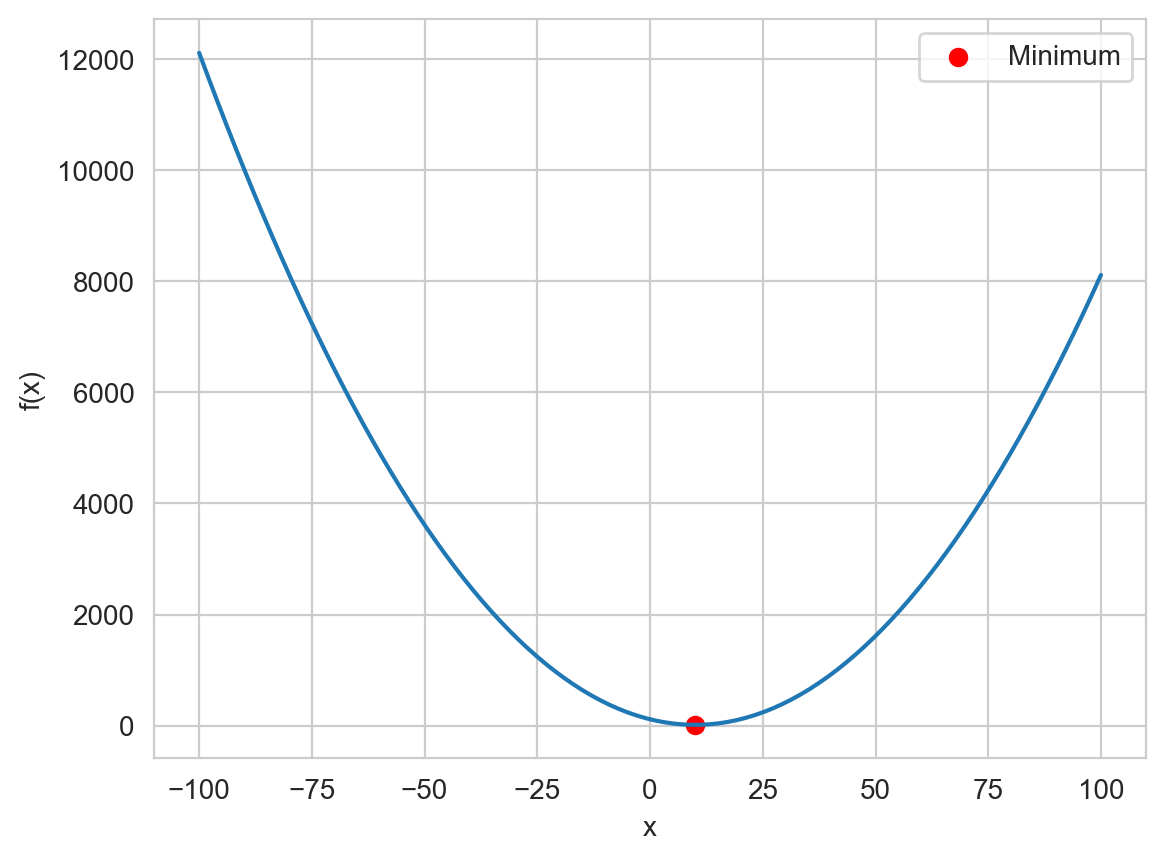

In [19]:
x = torch.linspace(-100, 100, 100)
y = func(x)

plt.plot(x, y)
plt.scatter([10], [14], label='Minimum', c='red')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [20]:
import time
from IPython import display

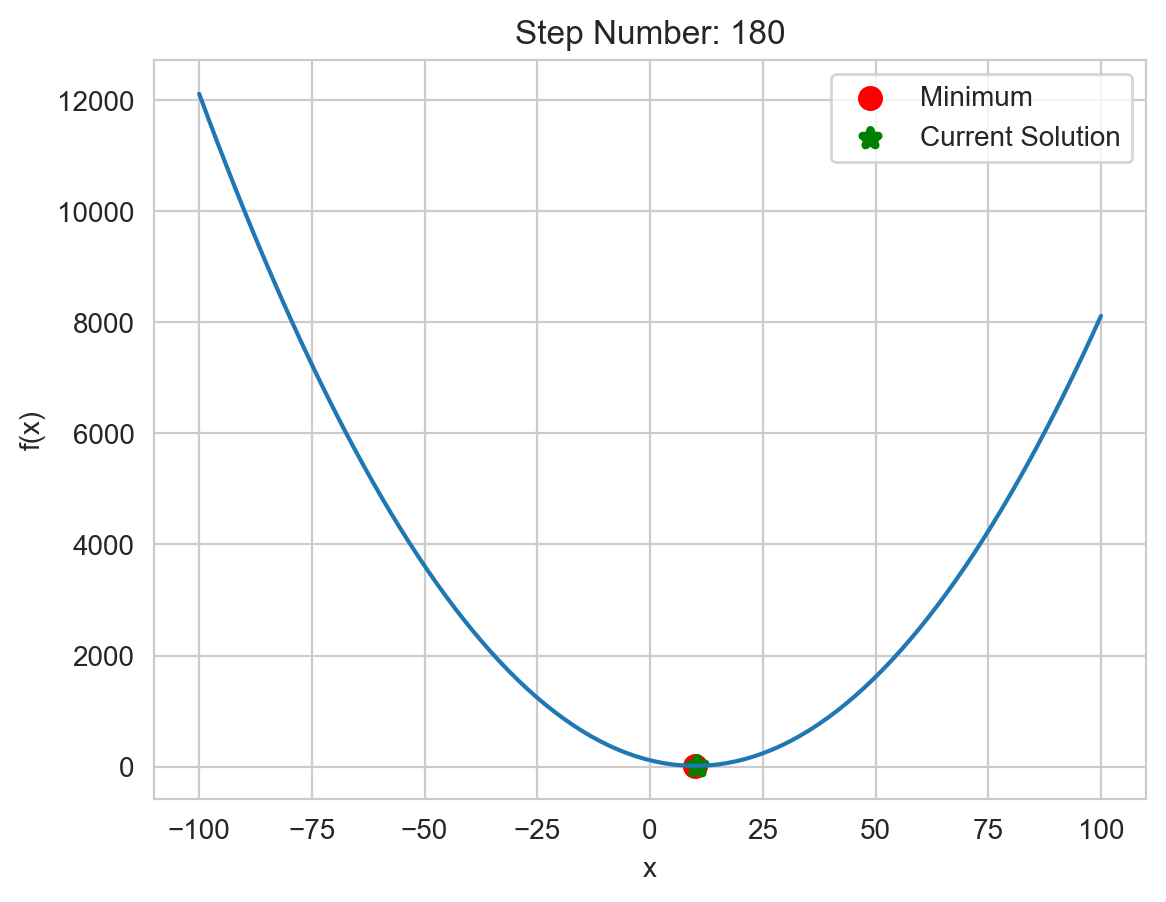

In [21]:
# requires_grad=True is required
# this is our starting point
current_solution = torch.randint(low=-100, high=100, size=(1,), dtype=torch.float32, requires_grad=True)

# initialize a simple SGD
# SGD will minimize only one variable — current_solution
optimizer = torch.optim.SGD([current_solution], lr=1e-2)

NUM_STEP = 200


for i in range(NUM_STEP):
    current_loss = func(current_solution)
    
    # zero out .grad of `current_solution` 
    # remember that otherwise your new gradients will be summed with the existing ones
    optimizer.zero_grad()
    
    # compute new gradient by `current_solution`
    current_loss.backward()
    
    # update current_solution
    optimizer.step()

    # some logging and visualization stuff
    if i % 20 == 0:
        display.clear_output()
        
        x = torch.linspace(-100, 100, 100)
        y = func(x)

        plt.plot(x, y)
        plt.scatter([10], [14], label="Minimum", c="red", linewidths=3)
        plt.scatter([current_solution.item()], [current_loss.item()],
                    label="Current Solution", marker="*", c="green", linewidths=3)
        
        plt.legend()
        plt.title(f"Step Number: {i}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.show()
        
        time.sleep(1)

# The General Pipeline

Training pipeline for your DNN model is similar to the example with some function above. To train your model you will need:

1. Define your model

2. Define a Dataset and DataLoader. Make sure you have at least 2 splits: train\test, so you can monitor performance on unseen data

3. Choose an optimizer. We advise you to use torch.optim.Adam or torch.optim.AdamW (if you use weight decay). Your optimizer should work with model.parameters() to optimize model weights. Basically, we will have model.parameters() instead of [current_solution] in the example above.

4. Choose a scheduler. That is, control learning rate (step size) for your optimizer. There are plenty of them in torch.optim.lr_scheduler. We advise you to use CosineAnnealing or OneCycleLR. The latter uses warm-up technique (the learning rate goes from low value to high during the first several steps and then the scheduler decreases the learning rate as usual), which is essential for Transformer-based models. The absence of scheduler is equivalent to a constant learning rate.

5. Iterate over your dataloader (for DNNs you reuse the same dataloader (the data shuffles) several times, a.k.a. epochs). For each batch, compute the loss, do .backward, run optimizer.step() to update weights and scheduler.step() to update learning rate. Do not forget to zero gradients between batches via calling oprimizer.zero_grad() after step() or at the beginning of the for-loop. Do some logging (recommended).
6. Finish, your model is trained.


The choice of the scheduler and optimizer depends on the task. There is no such setting that works all the time, you should try several settings and choose the one that works best for your task. However, usually Adam, AdamW and one of the mentioned schedulers should do the work (You may need to tune learning_rate and weight_decay. Do not forget to think about the total number of training steps)

If you want to work with a model from some paper, the best starting point would be to use the same optimizer and scheduler (with the same hyperparameters, i.e., learning rate, weight decay, etc.), as was done by the authors. However, if the paper is rather old and do not use Adam\AdamW (or at least SGD), it is better to use our suggested schedulers and optimizers instead (unless you are sure what and why you are doing). The exception is the case when you want to exactly reproduce the results from the paper. In such a case, you must use the paper authors' setting to get the authors results.